In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import MeCab
import re
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

'''plot theme'''
plt.style.use('ggplot') #ggplot스타일 사용
plt.rc('axes', unicode_minus=False)
rc('font', family='AppleGothic')

In [2]:
# 좌표계 데이터 불러오기
seoul = gpd.read_file("seoul_total_dong_polygon.shp")

In [27]:
cnt = pd.read_csv('data/필령이형전달.csv')

# 대출량 데이터와 좌표계 데이터 병합

In [7]:
seoul

,emd_cd,emd_eng_nm,emd_kor_nm,gu,hang,geometry
0,11110152,Bongik-dong,봉익동,종로구,종로1234가동,"POLYGON ((126.99254 37.57385, 126.99409 37.572..."
1,11110153,Donui-dong,돈의동,종로구,종로1234가동,"POLYGON ((126.99101 37.57336, 126.99178 37.570..."
2,11560123,Mullae-dong 5(o)-ga,문래동5가,영등포구,문래동,"POLYGON ((126.88453 37.51788, 126.88881 37.517..."
3,11110141,Anguk-dong,안국동,종로구,삼청동,"POLYGON ((126.98377 37.57947, 126.98426 37.579..."
4,11110142,Sogyeok-dong,소격동,종로구,삼청동,"POLYGON ((126.98112 37.58153, 126.98234 37.579..."
...,...,...,...,...,...,...
462,11560109,Yeongdeungpo-dong 8(pal)-ga,영등포동8가,영등포구,None,"POLYGON ((126.90683 37.53276, 126.90656 37.527..."
463,11560102,Yeongdeungpo-dong 1(il)-ga,영등포동1가,영등포구,None,"POLYGON ((126.91336 37.51863, 126.91646 37.517..."
464,11140134,Inhyeon-dong 2(i)-ga,인현동2가,중구,None,"POLYGON ((126.99777 37.56565, 126.99816 37.565..."
465,11140160,Inhyeon-dong 1(il)-ga,인현동1가,중구,None,"POLYGON ((126.99597 37.56562, 126.99579 37.565..."


In [22]:
cnt

,x_coord,y_coord,total_addr,city,dong1,dong1_code,dong2,dong2_code,lib_name,counts
0,126.875957,37.533654,서울특별시 양천구 목동 905,양천구,목동,1147010200,목5동,1147055000,양천도서관,45512
1,127.134839,37.499993,서울특별시 송파구 오금동 51,송파구,오금동,1171011200,오금동,1171057000,양천도서관,45512
2,126.968237,37.576300,서울특별시 종로구 사직동 1-28,종로구,사직동,1111011500,사직동,1111053000,양천도서관,45512
3,127.012451,37.502493,서울특별시 서초구 반포동 32-12,서초구,반포동,1165010700,반포1동,1165056000,양천도서관,45512
4,127.067748,37.639396,서울특별시 노원구 중계동 508,노원구,중계동,1135010600,중계2.3동,1135062500,양천도서관,45512
...,...,...,...,...,...,...,...,...,...,...
216,126.912158,37.598276,서울특별시 은평구 신사동 4-12,은평구,신사동,1138010900,,,양천도서관,45512
217,126.915099,37.604714,서울특별시 은평구 역촌동 62-23,은평구,역촌동,1138010800,역촌동,1138062500,양천도서관,45512
218,126.929331,37.602452,서울특별시 은평구 녹번동 87-1,은평구,녹번동,1138010200,녹번동,1138051000,양천도서관,45512
219,126.954647,37.526243,서울특별시 용산구 이촌동 206-2,용산구,이촌동,1117012900,이촌제2동,1117064000,양천도서관,45512


In [37]:
temp = pd.merge(seoul,cnt, left_on = ['emd_kor_nm','gu'], right_on = ['dong1','city'], how = 'left')
temp = temp.dropna()

temp2 = temp[['lib_name','emd_kor_nm','gu','geometry','x_coord','y_coord','counts']]

In [38]:
temp2.head()

,lib_name,emd_kor_nm,gu,geometry,x_coord,y_coord,counts
12,서울시립어린이도서관,사직동,종로구,"POLYGON ((126.96483 37.57818, 126.96515 37.577...",126.968237,37.576300,37082.0
13,종로도서관,사직동,종로구,"POLYGON ((126.96483 37.57818, 126.96515 37.577...",126.966457,37.576474,12909.0
47,강서구립길꽃어린이도서관,방화동,강서구,"POLYGON ((126.82024 37.59229, 126.82781 37.587...",126.813866,37.578689,7670.0
53,구로도서관,구로동,구로구,"POLYGON ((126.89281 37.50346, 126.89313 37.502...",126.891674,37.498542,18544.0
55,고척도서관,고척동,구로구,"POLYGON ((126.85404 37.51022, 126.85520 37.509...",126.853254,37.505352,23797.0


In [39]:
# 지하철 데이터도 이 과정 거쳐야 함
check_ls = (temp2['emd_kor_nm'] + '|' +temp2['gu']).tolist()
check_ls2 = (seoul['emd_kor_nm'] +'|'+ seoul['gu']).tolist()

non_ls = []
idx_ls = []
for i in range(len(seoul)):
    
    if check_ls2[i] in check_ls:
        pass
    else:
        non_ls.append(check_ls2[i])
        idx_ls.append(i)
        
seoul_non = seoul.iloc[idx_ls]
lib_cnt_df = pd.concat([temp2,seoul_non[['emd_kor_nm','gu','geometry']]],axis = 0)

In [44]:
lib_cnt_df.to_file('library_loan_cnt.shp', encoding = 'utf8')

# 승하차(유동인구) 데이터와 대출량 데이터 추이 비교

In [4]:
# 승하차 데이터 불러오기

#버스
bus = gpd.read_file('seoul_bus_ride.shp')

#지하철
sub = gpd.read_file('seoul_sub_ride.shp')

In [123]:
type(sub)

geopandas.geodataframe.GeoDataFrame

In [61]:
bus_gu = bus.groupby('gu')['rush','non_rush'].sum().reset_index()
sub_gu = sub.groupby('gu')['rush','non_rush'].sum().reset_index()
cnt_gu = cnt.groupby('city')['counts'].sum().reset_index().rename(columns = {'city' : 'gu'})

/Users/sinmin-yong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/Users/sinmin-yong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [63]:
sub_cnt = pd.merge(sub_gu,cnt_gu,on='gu',how = 'left')
bus_cnt = pd.merge(bus_gu,cnt_gu,on='gu',how = 'left')

In [126]:
with pd.ExcelWriter('data/sub-loan-trend.xlsx') as write:
    sub_cnt.to_excel(write, sheet_name='sheet-1')

In [127]:
with pd.ExcelWriter('data/bus-loan-trend.xlsx') as write:
    bus_cnt.to_excel(write, sheet_name='sheet-1')

In [64]:
sub_cnt.corr()

,rush,non_rush,counts
rush,1.000000,0.969393,0.564368
non_rush,0.969393,1.000000,0.603121
counts,0.564368,0.603121,1.000000


In [65]:
bus_cnt.corr()

,rush,non_rush,counts
rush,1.000000,0.975524,0.518096
non_rush,0.975524,1.000000,0.458713
counts,0.518096,0.458713,1.000000


In [133]:
scaler = MinMaxScaler()
scaler.fit(np.array(bus_cnt['rush']).reshape(-1,1))
bus_cnt['rush_scale_mm'] = scaler.transform(np.array(bus_cnt['rush']).reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit(np.array(bus_cnt['counts']).reshape(-1,1))
bus_cnt['counts_scale_mm'] = scaler.transform(np.array(bus_cnt['counts']).reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit(np.array(bus_cnt['non_rush']).reshape(-1,1))
bus_cnt['non_rush_scale_mm'] = scaler.transform(np.array(bus_cnt['non_rush']).reshape(-1,1))

In [134]:
scaler = MinMaxScaler()
scaler.fit(np.array(sub_cnt['rush']).reshape(-1,1))
sub_cnt['rush_scale_mm'] = scaler.transform(np.array(sub_cnt['rush']).reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit(np.array(sub_cnt['counts']).reshape(-1,1))
sub_cnt['counts_scale_mm'] = scaler.transform(np.array(sub_cnt['counts']).reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit(np.array(sub_cnt['non_rush']).reshape(-1,1))
sub_cnt['non_rush_scale_mm'] = scaler.transform(np.array(sub_cnt['non_rush']).reshape(-1,1))

In [165]:
bus_cnt.to_csv('필령형전달_bus.csv',index = False)
sub_cnt.to_csv('필령형전달_sub.csv',index = False)


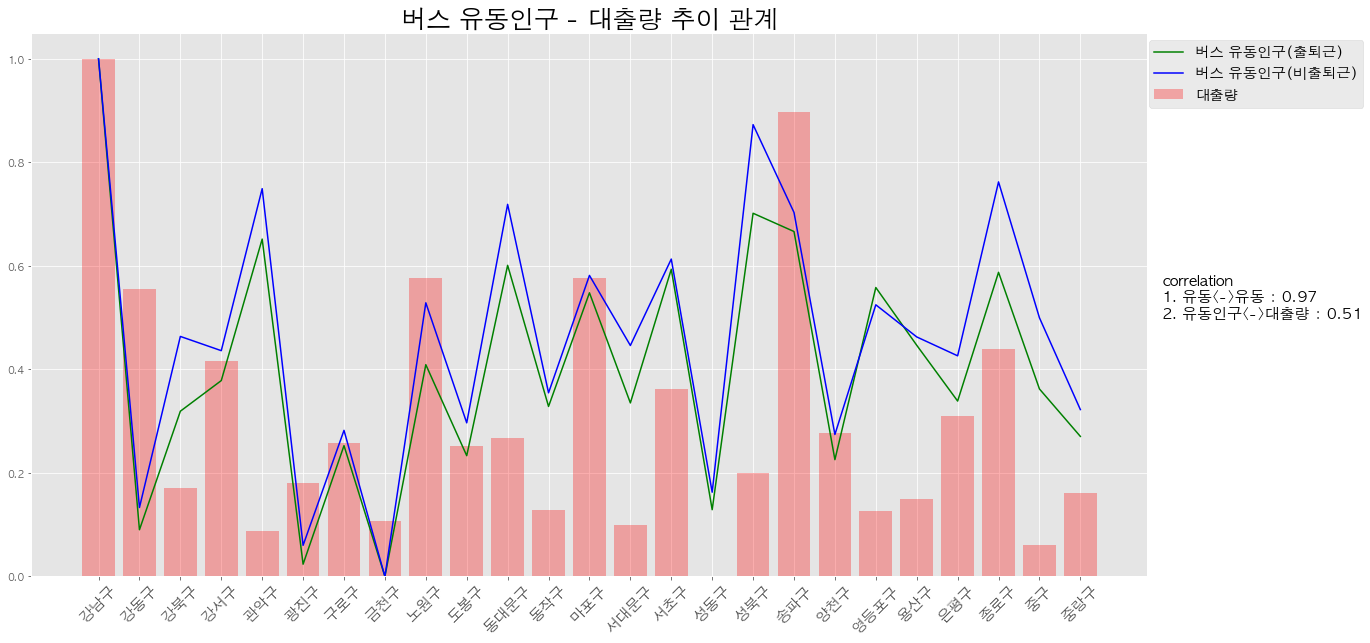

In [157]:
plt.figure(figsize = (20,10))
plt.plot(bus_cnt['gu'],bus_cnt['rush_scale_mm'], label = '버스 유동인구(출퇴근)',color = 'green')
plt.plot(bus_cnt['gu'],bus_cnt['non_rush_scale_mm'], label = '버스 유동인구(비출퇴근)',color = 'blue')
plt.bar(bus_cnt['gu'],bus_cnt['counts_scale_mm'], alpha = 0.3, label = '대출량',color='red')
plt.xticks(fontweight = 'bold', fontsize = 15, rotation = 45)
plt.title('버스 유동인구 - 대출량 추이 관계',fontweight = 'bold', fontsize = 25)
plt.text(26, 0.5, 'correlation\n1. 유동<->유동 : {}\n2. 유동인구<->대출량 : {}'.format(0.97, 0.51), fontsize=15)
plt.legend(fontsize = 'x-large',bbox_to_anchor=(1.2, 1))

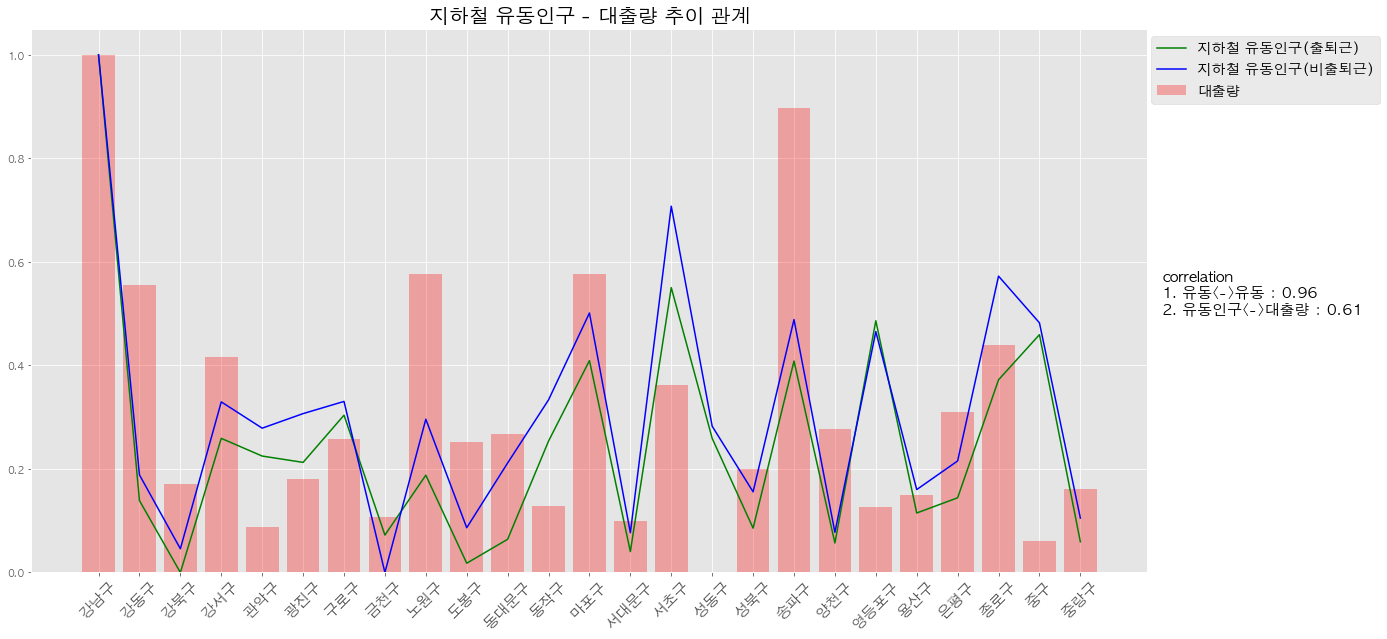

In [163]:
plt.figure(figsize = (20,10))
plt.plot(sub_cnt['gu'],sub_cnt['rush_scale_mm'], label = '지하철 유동인구(출퇴근)',color = 'green')
plt.plot(sub_cnt['gu'],sub_cnt['non_rush_scale_mm'], label = '지하철 유동인구(비출퇴근)',color = 'blue')
plt.bar(sub_cnt['gu'],sub_cnt['counts_scale_mm'], alpha = 0.3, label = '대출량',color='red')
plt.xticks(fontweight = 'bold', fontsize = 15, rotation = 45)
plt.title('지하철 유동인구 - 대출량 추이 관계',fontweight = 'bold', fontsize = 20)
plt.text(26, 0.5, 'correlation\n1. 유동<->유동 : {}\n2. 유동인구<->대출량 : {}'.format(0.96, 0.61), fontsize=15)
plt.legend(fontsize = 'x-large',bbox_to_anchor=(1.215, 1))

<BarContainer object of 25 artists>

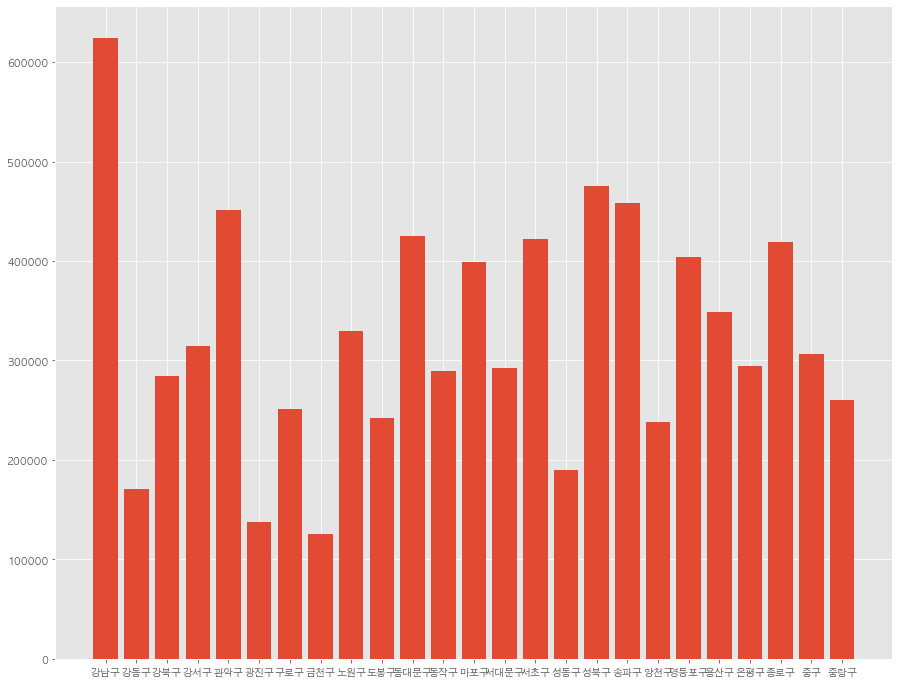

In [100]:
plt.figure(figsize = (15,12))
plt.bar(bus_cnt['gu'],bus_cnt['rush'])
#plt.plot(bus_cnt['gu'],bus_cnt[''])

In [46]:
sub

,SUB_STA_NM,x_coord,y_coord,gu,rush,non_rush,emd_kor_nm,geometry
0,안국,126.985443,37.576477,종로구,101421.166667,26425.933333,경운동,"POLYGON ((126.98628 37.57688, 126.98690 37.575..."
1,종각,126.982923,37.570161,종로구,187598.000000,44933.333333,종로1가,"POLYGON ((126.98205 37.57051, 126.98315 37.570..."
2,종로3가,126.991806,37.571607,종로구,194805.333333,90678.066667,묘동,"POLYGON ((126.99155 37.57420, 126.99229 37.572..."
3,마곡,126.825448,37.560183,강서구,40337.500000,10700.133333,마곡동,"POLYGON ((126.84241 37.57926, 126.83753 37.570..."
4,마곡나루,126.829497,37.567336,강서구,89691.166667,18869.066667,마곡동,"POLYGON ((126.84241 37.57926, 126.83753 37.570..."
...,...,...,...,...,...,...,...,...
272,신정,126.856191,37.524997,양천구,61263.666667,15690.266667,신정동,"POLYGON ((126.86398 37.52964, 126.86428 37.526..."
273,압구정,127.028461,37.527072,강남구,150612.500000,46759.533333,신사동,"MULTIPOLYGON (((127.02191 37.51711, 127.01953 ..."
274,압구정로데오,127.040534,37.527381,강남구,86831.833333,25375.733333,신사동,"MULTIPOLYGON (((127.02191 37.51711, 127.01953 ..."
275,응암,126.915577,37.598605,은평구,80063.333333,23790.000000,신사동,"POLYGON ((126.90211 37.60374, 126.90492 37.603..."
